In [1]:
from pandas import pandas as pd
import numpy as np
import random
import csv, sqlite3
import logging
import cProfile
import lazypandas
import matplotlib.pyplot as plt
import datetime, scipy 

In [2]:
lz = lazypandas.lazy_pandas()

LZ Creating engine


In [3]:
airlines = lz.read_csv('../dot/airlines.csv')
airports = lz.read_csv('../dot/airports.csv')
data  = lz.read_csv('../dot/red_flights.csv')

table name airlines
new_stack
140371221582960
new lzpd stack {'airlines': ['IATA_CODE', 'AIRLINE', 'auto_index']} select airlines.IATA_CODE, airlines.AIRLINE, airlines.auto_index
from airlines

table name airports
new_stack
140371216774872
new lzpd stack {'airports': ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'auto_index']} select airports.IATA_CODE, airports.AIRPORT, airports.CITY, airports.STATE, airports.COUNTRY, airports.LATITUDE, airports.LONGITUDE, airports.auto_index
from airports

table name red_flights
new_stack
140371221049976
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON

In [4]:
data.execute('select auto_index from red_flights limit 5 ').fetchall()

[(0,), (1,), (2,), (3,), (4,)]

In [5]:
data['airline']

caught get [ airline ]
col_name airline
simple project airline
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index']} select airline
from red_flights

1D


['AS' 'AA' 'US' ... 'NK' 'OO' 'UA']

In [6]:
data.info()

lazyDataFrame
tables
  red_flights :
    YEAR : REAL
    MONTH : REAL
    DAY : REAL
    DAY_OF_WEEK : REAL
    AIRLINE : TEXT
    FLIGHT_NUMBER : REAL
    TAIL_NUMBER : TEXT
    ORIGIN_AIRPORT : TEXT
    DESTINATION_AIRPORT : TEXT
    SCHEDULED_DEPARTURE : REAL
    DEPARTURE_TIME : REAL
    DEPARTURE_DELAY : REAL
    TAXI_OUT : REAL
    WHEELS_OFF : REAL
    SCHEDULED_TIME : REAL
    ELAPSED_TIME : REAL
    AIR_TIME : REAL
    DISTANCE : REAL
    WHEELS_ON : REAL
    TAXI_IN : REAL
    SCHEDULED_ARRIVAL : REAL
    ARRIVAL_TIME : REAL
    ARRIVAL_DELAY : REAL
    DIVERTED : REAL
    CANCELLED : REAL
    CANCELLATION_REASON : TEXT
    AIR_SYSTEM_DELAY : REAL
    SECURITY_DELAY : REAL
    AIRLINE_DELAY : REAL
    LATE_AIRCRAFT_DELAY : REAL
    WEATHER_DELAY : REAL
    auto_index : INTEGER



In [7]:
data.stack.select_stack

['red_flights.YEAR',
 'red_flights.MONTH',
 'red_flights.DAY',
 'red_flights.DAY_OF_WEEK',
 'red_flights.AIRLINE',
 'red_flights.FLIGHT_NUMBER',
 'red_flights.TAIL_NUMBER',
 'red_flights.ORIGIN_AIRPORT',
 'red_flights.DESTINATION_AIRPORT',
 'red_flights.SCHEDULED_DEPARTURE',
 'red_flights.DEPARTURE_TIME',
 'red_flights.DEPARTURE_DELAY',
 'red_flights.TAXI_OUT',
 'red_flights.WHEELS_OFF',
 'red_flights.SCHEDULED_TIME',
 'red_flights.ELAPSED_TIME',
 'red_flights.AIR_TIME',
 'red_flights.DISTANCE',
 'red_flights.WHEELS_ON',
 'red_flights.TAXI_IN',
 'red_flights.SCHEDULED_ARRIVAL',
 'red_flights.ARRIVAL_TIME',
 'red_flights.ARRIVAL_DELAY',
 'red_flights.DIVERTED',
 'red_flights.CANCELLED',
 'red_flights.CANCELLATION_REASON',
 'red_flights.AIR_SYSTEM_DELAY',
 'red_flights.SECURITY_DELAY',
 'red_flights.AIRLINE_DELAY',
 'red_flights.LATE_AIRCRAFT_DELAY',
 'red_flights.WEATHER_DELAY',
 'red_flights.auto_index']

In [8]:
byday = data.groupby('DAY')

caught groupby DAY
R: looking for  DAY in red_flights ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index']
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY'

In [9]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,auto_index
count,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,97701.000000,97701.000000,97628.000000,97628.000000,...,97559.000000,97386.000000,99999.000000,99999.000000,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000,99999.000000
mean,2015.0,1.0,3.733887,4.107321,2240.849648,1306.350254,1326.267930,19.938046,17.155908,1348.428514,...,1458.032442,18.342575,0.002240,0.023890,14.026801,0.070787,17.853921,26.014556,2.751971,49999.000000
std,0.0,0.0,1.815522,2.098459,1818.708843,482.327514,503.511173,45.843719,10.738428,504.144849,...,538.213952,48.878412,0.047276,0.152708,25.965405,1.692526,43.527539,42.593343,17.265760,28867.369122
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,2.000000,2.000000,759.000000,904.000000,911.000000,-3.000000,11.000000,928.000000,...,1050.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24999.500000
50%,2015.0,1.0,4.000000,4.000000,1693.000000,1300.000000,1317.000000,3.000000,14.000000,1330.000000,...,1455.000000,4.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000,49999.000000
75%,2015.0,1.0,5.000000,6.000000,3394.000000,1720.000000,1739.000000,25.000000,20.000000,1753.000000,...,1911.000000,27.000000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000,74998.500000
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2400.000000,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000,99998.000000


In [10]:
a = byday['ELAPSED_TIME'].max()
a.generate_stack()

caught get [ ELAPSED_TIME ]
col_name ELAPSED_TIME
empty aggr func stak []
aggr project red_flights.DAY ELAPSED_TIME ELAPSED_TIME
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index']} select ELAPSED_TIME
from red_flights
group by (red_flights.DAY)

caught max
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', '

select max(ELAPSED_TIME)
from red_flights
group by (red_flights.DAY)

caught get [ DISTANCE ]
col_name DISTANCE
empty aggr func stak []
aggr project red_flights.DAY DISTANCE DISTANCE
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index']} select DISTANCE
from red_flights
group by (red_flights.DAY)

caught get [ DAY ]
col_name DAY
empty aggr func stak []
aggr project red_flights.DAY DAY DAY
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'D

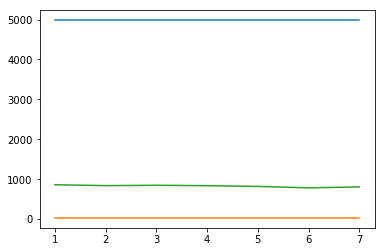

In [11]:
a = byday['DISTANCE']
plt.plot(byday['DAY'].array, a.max().array)
plt.plot(byday['DAY'].array, a.min().array)
plt.plot(byday['DAY'].array, a.avg().array)
plt.show()

In [12]:
data['new'] = 1

caught set [] new 1
R: looking for  new in red_flights ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index']
caught get [ red_flights.auto_index ]
col_name red_flights.auto_index
simple project red_flights.auto_index
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_

In [13]:
hei = data.groupby('AIRLINE')
hei.generate_query()

caught groupby AIRLINE
R: looking for  AIRLINE in red_flights ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index']
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTE

'select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBER, red_flights.TAIL_NUMBER, red_flights.ORIGIN_AIRPORT, red_flights.DESTINATION_AIRPORT, red_flights.SCHEDULED_DEPARTURE, red_flights.DEPARTURE_TIME, red_flights.DEPARTURE_DELAY, red_flights.TAXI_OUT, red_flights.WHEELS_OFF, red_flights.SCHEDULED_TIME, red_flights.ELAPSED_TIME, red_flights.AIR_TIME, red_flights.DISTANCE, red_flights.WHEELS_ON, red_flights.TAXI_IN, red_flights.SCHEDULED_ARRIVAL, red_flights.ARRIVAL_TIME, red_flights.ARRIVAL_DELAY, red_flights.DIVERTED, red_flights.CANCELLED, red_flights.CANCELLATION_REASON, red_flights.AIR_SYSTEM_DELAY, red_flights.SECURITY_DELAY, red_flights.AIRLINE_DELAY, red_flights.LATE_AIRCRAFT_DELAY, red_flights.WEATHER_DELAY, red_flights.auto_index, auto_generated_table_new.new\nfrom red_flights, auto_generated_table_new\nwhere (auto_generated_table_new.auto_index = red_flights.auto_index)\ngroup by (red_flights.AIRL

In [14]:
lol = hei.RA.ra_stack.groupby_stack
print(lol)

['red_flights.AIRLINE']


In [15]:
data['new'] = 1

caught set [] new 1
R: looking for  new in red_flights ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index']
R: looking for  new in auto_generated_table_new ['new', 'auto_index']
caught get [ red_flights.auto_index ]
col_name red_flights.auto_index
simple project red_flights.auto_index
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAP

In [16]:
data.execute("""
    select red_flights.auto_index
    from red_flights, auto_generated_table_new
    where (auto_generated_table_new.auto_index = red_flights.auto_index)
    limit 5 """).description

(('auto_index', None, None, None, None, None, None),)

In [17]:
data.to_pd().describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,auto_index,new
count,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,97701.000000,97701.000000,97628.000000,97628.000000,...,97386.000000,99999.000000,99999.000000,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000,99999.000000,99999.0
mean,2015.0,1.0,3.733887,4.107321,2240.849648,1306.350254,1326.267930,19.938046,17.155908,1348.428514,...,18.342575,0.002240,0.023890,14.026801,0.070787,17.853921,26.014556,2.751971,49999.000000,1.0
std,0.0,0.0,1.815522,2.098459,1818.708843,482.327514,503.511173,45.843719,10.738428,504.144849,...,48.878412,0.047276,0.152708,25.965405,1.692526,43.527539,42.593343,17.265760,28867.369122,0.0
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2015.0,1.0,2.000000,2.000000,759.000000,904.000000,911.000000,-3.000000,11.000000,928.000000,...,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24999.500000,1.0
50%,2015.0,1.0,4.000000,4.000000,1693.000000,1300.000000,1317.000000,3.000000,14.000000,1330.000000,...,4.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000,49999.000000,1.0
75%,2015.0,1.0,5.000000,6.000000,3394.000000,1720.000000,1739.000000,25.000000,20.000000,1753.000000,...,27.000000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000,74998.500000,1.0
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000,99998.000000,1.0


In [18]:
data.generate_query()

'select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBER, red_flights.TAIL_NUMBER, red_flights.ORIGIN_AIRPORT, red_flights.DESTINATION_AIRPORT, red_flights.SCHEDULED_DEPARTURE, red_flights.DEPARTURE_TIME, red_flights.DEPARTURE_DELAY, red_flights.TAXI_OUT, red_flights.WHEELS_OFF, red_flights.SCHEDULED_TIME, red_flights.ELAPSED_TIME, red_flights.AIR_TIME, red_flights.DISTANCE, red_flights.WHEELS_ON, red_flights.TAXI_IN, red_flights.SCHEDULED_ARRIVAL, red_flights.ARRIVAL_TIME, red_flights.ARRIVAL_DELAY, red_flights.DIVERTED, red_flights.CANCELLED, red_flights.CANCELLATION_REASON, red_flights.AIR_SYSTEM_DELAY, red_flights.SECURITY_DELAY, red_flights.AIRLINE_DELAY, red_flights.LATE_AIRCRAFT_DELAY, red_flights.WEATHER_DELAY, red_flights.auto_index, auto_generated_table_new.new\nfrom red_flights, auto_generated_table_new\nwhere (auto_generated_table_new.auto_index = red_flights.auto_index)\n'

In [19]:
data.info()

lazyDataFrame
tables
  red_flights :
    YEAR : REAL
    MONTH : REAL
    DAY : REAL
    DAY_OF_WEEK : REAL
    AIRLINE : TEXT
    FLIGHT_NUMBER : REAL
    TAIL_NUMBER : TEXT
    ORIGIN_AIRPORT : TEXT
    DESTINATION_AIRPORT : TEXT
    SCHEDULED_DEPARTURE : REAL
    DEPARTURE_TIME : REAL
    DEPARTURE_DELAY : REAL
    TAXI_OUT : REAL
    WHEELS_OFF : REAL
    SCHEDULED_TIME : REAL
    ELAPSED_TIME : REAL
    AIR_TIME : REAL
    DISTANCE : REAL
    WHEELS_ON : REAL
    TAXI_IN : REAL
    SCHEDULED_ARRIVAL : REAL
    ARRIVAL_TIME : REAL
    ARRIVAL_DELAY : REAL
    DIVERTED : REAL
    CANCELLED : REAL
    CANCELLATION_REASON : TEXT
    AIR_SYSTEM_DELAY : REAL
    SECURITY_DELAY : REAL
    AIRLINE_DELAY : REAL
    LATE_AIRCRAFT_DELAY : REAL
    WEATHER_DELAY : REAL
    auto_index : INTEGER

  auto_generated_table_new :
    new : REAL
    auto_index : INTEGER



In [20]:
data2 = data.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE')
data2.shape

caught merge
merge ['red_flights', 'auto_generated_table_new'] ['airlines']
new_stack
140371203161560
R: looking for  AIRLINE in red_flights
R: looking for  AIRLINE in auto_generated_table_new
L: looking for  IATA_CODE in airlines
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index'], 'airlines': ['IATA_CODE', 'AIRLINE', 'auto_index']} select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBE

(99999, 36)

In [21]:
airports.shape

(322, 8)

In [22]:
a = data['MONTH'] == 1
b = data['DAY']
c = data['DAY']
print((a))
print((b.stack))
print((c.stack))
print((data.stack))


caught get [ MONTH ]
col_name MONTH
simple project MONTH
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select MONTH
from red_flights, auto_generated_table_new
where (auto_generated_table_new.auto_index = red_flights.auto_index)

caught eq 1
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAX

In [23]:
airports = airports.dropna(subset = ['LATITUDE','LONGITUDE'])

caught drop na subset () {'subset': ['LATITUDE', 'LONGITUDE']}
new lzpd stack {'airports': ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'auto_index']} select airports.IATA_CODE, airports.AIRPORT, airports.CITY, airports.STATE, airports.COUNTRY, airports.LATITUDE, airports.LONGITUDE, airports.auto_index
from airports
where (LATITUDE is not null) and (LONGITUDE is not null)



In [24]:
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

caught drop na subset () {'subset': ['TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']}
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBER, red_flights.TAIL_NUMBER, red_flights.ORIGIN_AIRPORT, red_flig

In [25]:
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

caught drop na subset () {'subset': ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']}
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBER, red_flights.TAIL_NUMBER, red_flights.ORIGIN_AIRPORT, red_flights.DESTINATION_AIRPORT, red_flights.SCHEDULED_DEPARTURE, red_flights.DEPARTURE_TIME, 

In [26]:
# The other Dataset
Flight_Delays = data11

In [27]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

caught drop  labels (['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],) {'axis': 1}
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBER, red_flights.TAIL_NUMBER, red_flights.ORIGIN_AIRPORT, red_flights.DESTINATION_AIRPORT, red_flights.SCHEDULED_DEPARTURE, red_fli

In [28]:
data2.shape

(97386, 33)

In [29]:
data2.info()

lazyDataFrame
tables
  red_flights :
    YEAR : REAL
    MONTH : REAL
    DAY : REAL
    DAY_OF_WEEK : REAL
    AIRLINE : TEXT
    FLIGHT_NUMBER : REAL
    TAIL_NUMBER : TEXT
    ORIGIN_AIRPORT : TEXT
    DESTINATION_AIRPORT : TEXT
    SCHEDULED_DEPARTURE : REAL
    DEPARTURE_TIME : REAL
    DEPARTURE_DELAY : REAL
    TAXI_OUT : REAL
    WHEELS_OFF : REAL
    SCHEDULED_TIME : REAL
    ELAPSED_TIME : REAL
    AIR_TIME : REAL
    DISTANCE : REAL
    WHEELS_ON : REAL
    TAXI_IN : REAL
    SCHEDULED_ARRIVAL : REAL
    ARRIVAL_TIME : REAL
    ARRIVAL_DELAY : REAL
    DIVERTED : REAL
    CANCELLED : REAL
    CANCELLATION_REASON : TEXT
    AIR_SYSTEM_DELAY : REAL
    SECURITY_DELAY : REAL
    AIRLINE_DELAY : REAL
    LATE_AIRCRAFT_DELAY : REAL
    WEATHER_DELAY : REAL
    auto_index : INTEGER

  auto_generated_table_new :
    new : REAL
    auto_index : INTEGER



In [30]:
# Creating a function to change the way of representation of time in the column
@np.vectorize
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [31]:
data1['CANCELLED']

caught get [ CANCELLED ]
col_name CANCELLED
simple project CANCELLED
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select CANCELLED
from red_flights, auto_generated_table_new
where (auto_generated_table_new.auto_index = red_flights.auto_index) and (TAIL_NUMBER is not null) and (DEPARTURE_TIME is not null) and (DEPARTURE_DELAY is not null) and (TAXI_OUT is not null) and (WHEELS_OFF is not null) and (SCHEDULED_TIME is not null) and (ELAPSED_TIME is not null)

[0 0 0 ... 0 0 0]

In [32]:
out = data1.execute('select month, airline, AVG(CANCELLED) from red_flights group by airline, month ').fetchall()
m, a, rel = list(map(list, zip(*out)))


['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN']


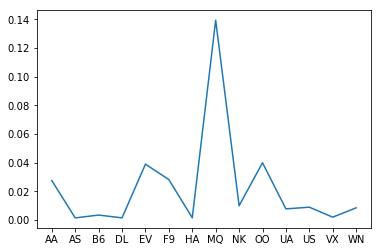

In [33]:
print(a)
plt.plot(a, rel)
plt.show()

In [34]:
x = data1['DEPARTURE_TIME'].apply(Format_Hourmin)
#data2['Actual_Departure'] = x
x

caught get [ DEPARTURE_TIME ]
col_name DEPARTURE_TIME
simple project DEPARTURE_TIME
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select DEPARTURE_TIME
from red_flights, auto_generated_table_new
where (auto_generated_table_new.auto_index = red_flights.auto_index) and (TAIL_NUMBER is not null) and (DEPARTURE_TIME is not null) and (DEPARTURE_DELAY is not null) and (TAXI_OUT is not null) and (WHEELS_OFF is not null) and (SCHEDULED_TIME is not null) and (ELAPS

,DEPARTURE_TIME
0,23:54:00
1,00:02:00
2,00:18:00
3,00:15:00
4,00:24:00
5,00:20:00
6,00:19:00
7,00:44:00
8,00:19:00
9,00:33:00


caught get [ ELAPSED_TIME ]
col_name ELAPSED_TIME
simple project ELAPSED_TIME
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select ELAPSED_TIME
from red_flights, auto_generated_table_new
where (auto_generated_table_new.auto_index = red_flights.auto_index)

1D
caught get [ DISTANCE ]
col_name DISTANCE
simple project DISTANCE
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'D

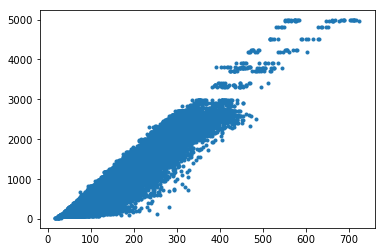

In [35]:
plt.plot(data['ELAPSED_TIME'].array, data['DISTANCE'].array, '.')
plt.show()

In [36]:
data = data.dropna(['DISTANCE', 'ARRIVAL_DELAY'])
type(a)

caught drop na subset (['DISTANCE', 'ARRIVAL_DELAY'],) {}
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBER, red_flights.TAIL_NUMBER, red_flights.ORIGIN_AIRPORT, red_flights.DESTINATION_AIRPORT, red_flights.SCHEDULED_DEPARTURE, red_flights.DEPARTURE_TIME, red_flights.DEPARTURE_DELAY, red_flights.TAXI_OUT, red_flights.WHEELS_OFF, 

list

caught get [ DISTANCE ]
col_name DISTANCE
simple project DISTANCE
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select DISTANCE
from red_flights, auto_generated_table_new
where (auto_generated_table_new.auto_index = red_flights.auto_index) and (DISTANCE is not null) and (ARRIVAL_DELAY is not null)

caught get [ ARRIVAL_DELAY ]
col_name ARRIVAL_DELAY
simple project ARRIVAL_DELAY
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE

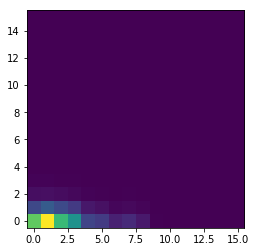

In [37]:
x = data['DISTANCE'].to_pd().values.flatten()
y = data['ARRIVAL_DELAY'].to_pd().values.flatten()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=16)
plt.imshow(heatmap.T, origin='lower')
plt.show()

In [38]:
a = data['DISTANCE']
a.generate_stack()

caught get [ DISTANCE ]
col_name DISTANCE
simple project DISTANCE
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index']} select DISTANCE
from red_flights, auto_generated_table_new
where (auto_generated_table_new.auto_index = red_flights.auto_index) and (DISTANCE is not null) and (ARRIVAL_DELAY is not null)



select DISTANCE
from red_flights, auto_generated_table_new
where (auto_generated_table_new.auto_index = red_flights.auto_index) and (DISTANCE is not null) and (ARRIVAL_DELAY is not null)

In [39]:
from util import csvToDb, out_to_pd
out = data.execute('select min(AIRLINE_DELAY) from red_flights')
print(out.description[0])
out.fetchone()
#data.dotted_datatype

('min(AIRLINE_DELAY)', None, None, None, None, None, None)


(0.0,)

In [40]:
a = data.to_pd()
a.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,auto_index,new
count,97386.0,97386.0,97386.000000,97386.000000,97386.000000,97386.000000,97386.000000,97386.000000,97386.000000,97386.000000,...,97386.000000,97386.0,97386.0,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000,97386.000000,97386.0
mean,2015.0,1.0,3.735167,4.109502,2214.549976,1306.490420,1325.959922,19.849023,17.149282,1348.261896,...,18.342575,0.0,0.0,14.026801,0.070787,17.853921,26.014556,2.751971,50018.594829,1.0
std,0.0,0.0,1.815567,2.096948,1813.100157,481.964622,503.317169,45.727082,10.729890,504.108128,...,48.878412,0.0,0.0,25.965405,1.692526,43.527539,42.593343,17.265760,28851.096818,0.0
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,-65.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2015.0,1.0,2.000000,2.000000,747.250000,905.000000,911.000000,-3.000000,11.000000,928.000000,...,-8.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25011.250000,1.0
50%,2015.0,1.0,4.000000,4.000000,1670.000000,1300.000000,1317.000000,3.000000,14.000000,1330.000000,...,4.000000,0.0,0.0,4.000000,0.000000,4.000000,10.000000,0.000000,49936.500000,1.0
75%,2015.0,1.0,5.000000,6.000000,3339.000000,1718.750000,1738.000000,25.000000,20.000000,1752.000000,...,27.000000,0.0,0.0,19.000000,0.000000,19.000000,35.000000,0.000000,74926.750000,1.0
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,1384.000000,0.0,0.0,590.000000,107.000000,1380.000000,891.000000,562.000000,99998.000000,1.0


In [41]:
data.info()

lazyDataFrame
tables
  red_flights :
    YEAR : REAL
    MONTH : REAL
    DAY : REAL
    DAY_OF_WEEK : REAL
    AIRLINE : TEXT
    FLIGHT_NUMBER : REAL
    TAIL_NUMBER : TEXT
    ORIGIN_AIRPORT : TEXT
    DESTINATION_AIRPORT : TEXT
    SCHEDULED_DEPARTURE : REAL
    DEPARTURE_TIME : REAL
    DEPARTURE_DELAY : REAL
    TAXI_OUT : REAL
    WHEELS_OFF : REAL
    SCHEDULED_TIME : REAL
    ELAPSED_TIME : REAL
    AIR_TIME : REAL
    DISTANCE : REAL
    WHEELS_ON : REAL
    TAXI_IN : REAL
    SCHEDULED_ARRIVAL : REAL
    ARRIVAL_TIME : REAL
    ARRIVAL_DELAY : REAL
    DIVERTED : REAL
    CANCELLED : REAL
    CANCELLATION_REASON : TEXT
    AIR_SYSTEM_DELAY : REAL
    SECURITY_DELAY : REAL
    AIRLINE_DELAY : REAL
    LATE_AIRCRAFT_DELAY : REAL
    WEATHER_DELAY : REAL
    auto_index : INTEGER

  auto_generated_table_new :
    new : REAL
    auto_index : INTEGER



In [42]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

caught merge
merge ['red_flights', 'auto_generated_table_new'] ['airlines']
new_stack
140371134257024
R: looking for  AIRLINE in red_flights
R: looking for  AIRLINE in auto_generated_table_new
L: looking for  IATA_CODE in airlines
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index'], 'airlines': ['IATA_CODE', 'AIRLINE', 'auto_index']} select red_flights.YEAR, red_flights.MONTH, red_flights.DAY, red_flights.DAY_OF_WEEK, red_flights.AIRLINE, red_flights.FLIGHT_NUMBE

In [43]:
data2['airlines.AIRLINE']

caught get [ airlines.AIRLINE ]
col_name airlines.AIRLINE
simple project airlines.AIRLINE
new lzpd stack {'red_flights': ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'auto_index'], 'auto_generated_table_new': ['new', 'auto_index'], 'airlines': ['IATA_CODE', 'AIRLINE', 'auto_index']} select airlines.AIRLINE
from red_flights, auto_generated_table_new, airlines
where (auto_generated_table_new.auto_index = red_flights.auto_index) and (TAIL_NUMBER is not null) and (DEPARTURE_TIME is not null) and (DEPARTURE_DELAY is not null) and (TAXI_OUT is not null) an

['Alaska Airlines Inc.' 'American Airlines Inc.' 'US Airways Inc.' ...
 'Spirit Air Lines' 'Skywest Airlines Inc.' 'United Air Lines Inc.']